# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as Model
# from sklearn.linear_model import Lasso as Model
# from sklearn.neural_network import MLPRegressor as Model
from sklearn.metrics import r2_score

from final_data import final_df

'Loading Final DataFrame'


<ipython-input-1-6314dae9cc2e>:11: DtypeWarning: Columns (67,68,69,70,71) have mixed types.Specify dtype option on import or set low_memory=False.
  from final_data import final_df


# Import Data

In [2]:
df = final_df.copy()
df

,date,fips,Lead (TSP) LC,Carbon monoxide,Sulfur dioxide,Nitrogen dioxide (NO2),Ozone,PM10 - LC,PM2.5 - Local Conditions,county,...,Administered_Dose1_Recip_18PlusPop_Pct,Administered_Dose1_Recip_65PlusPop_Pct,SVI_CTGY,Series_Complete_Pop_Pct_SVI,Series_Complete_12PlusPop_Pct_SVI,Series_Complete_18PlusPop_Pct_SVI,Series_Complete_65PlusPop_Pct_SVI,active,new,percentage_new
0,2020-03-22,36061,NaN,0.19075,NaN,NaN,0.034988,NaN,NaN,New York City,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-03-22,36059,NaN,NaN,0.20119,NaN,NaN,NaN,NaN,Nassau,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-03-22,36119,NaN,NaN,NaN,NaN,0.039600,NaN,NaN,Westchester,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-03-22,36103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Suffolk,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-03-22,36087,NaN,NaN,NaN,NaN,0.037064,NaN,NaN,Rockland,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1461152,2021-06-30,56037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sweetwater,...,42.6,80.4,Low-Mod,Low VC/Low-Mod SVI,Low-Mod VC/Low-Mod SVI,Low-Mod VC/Low-Mod SVI,High VC/Low-Mod SVI,107.0,NaN,NaN
1461153,2021-06-30,56039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Teton,...,90.9,87.0,Low,High VC/Low SVI,High VC/Low SVI,High VC/Low SVI,High VC/Low SVI,4.0,NaN,NaN
1461154,2021-06-30,56041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Uinta,...,46.0,76.3,Low-Mod,Low-Mod VC/Low-Mod SVI,Low-Mod VC/Low-Mod SVI,Mod-High VC/Low-Mod SVI,High VC/Low-Mod SVI,18.0,NaN,NaN
1461155,2021-06-30,56043,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Washakie,...,40.5,72.5,Low-Mod,Low VC/Low-Mod SVI,Low-Mod VC/Low-Mod SVI,Low-Mod VC/Low-Mod SVI,Mod-High VC/Low-Mod SVI,1.0,NaN,NaN


In [12]:
select = df[['PM2.5 - Local Conditions', 'percentage_new']]
select.dropna(inplace=True)

x_train = select['PM2.5 - Local Conditions']
y_train = select['percentage_new']

array([False])

In [3]:
df.columns

Index(['date', 'fips', 'Lead (TSP) LC', 'Carbon monoxide', 'Sulfur dioxide',
       'Nitrogen dioxide (NO2)', 'Ozone', 'PM10 - LC',
       'PM2.5 - Local Conditions', 'county', 'ideal latitude_x',
       'ideal longitude_x', 'state', 'Confirmed', 'Deaths', 'Recovered',
       'population', 'state abbreviation',
       'Percent of adults with less than a high school diploma, 2015-19',
       'Percent of adults with a high school diploma only, 2015-19',
       'Percent of adults completing some college or associate's degree, 2015-19',
       'Percent of adults with a bachelor's degree or higher, 2015-19',
       'PCTPOVALL_2019', 'PCTPOV017_2019', 'PCTPOV517_2019', 'Total Pop',
       'Pop Pct 0-4', 'Pop Pct 5-9', 'Pop Pct 10-14', 'Pop Pct 15-19',
       'Pop Pct 20-24', 'Pop Pct 25-29', 'Pop Pct 30-34', 'Pop Pct 35-39',
       'Pop Pct 40-44', 'Pop Pct 45-49', 'Pop Pct 50-54', 'Pop Pct 55-59',
       'Pop Pct 60-64', 'Pop Pct 65-69', 'Pop Pct 70-74', 'Pop Pct 75-79',
       'Pop Pct 80-

# Drop NaN

In [4]:
df.dropna(inplace=True)

# Define x and y

In [5]:
independents = ['Lead (TSP) LC', 'Carbon monoxide', 'Sulfur dioxide', 'Nitrogen dioxide (NO2)', 'Ozone', 'PM10 - LC', 'PM2.5 - Local Conditions', 'Percent of adults with less than a high school diploma, 2015-19', 'Percent of adults with a high school diploma only, 2015-19', "Percent of adults completing some college or associate's degree, 2015-19", "Percent of adults with a bachelor's degree or higher, 2015-19", 'PCTPOVALL_2019', 'PCTPOV017_2019', 'PCTPOV517_2019', 'Total Pop',  'Pop Pct 0-4', 'Pop Pct 5-9', 'Pop Pct 10-14', 'Pop Pct 15-19', 'Pop Pct 20-24', 'Pop Pct 25-29', 'Pop Pct 30-34', 'Pop Pct 35-39', 'Pop Pct 40-44', 'Pop Pct 45-49', 'Pop Pct 50-54', 'Pop Pct 55-59', 'Pop Pct 60-64', 'Pop Pct 65-69', 'Pop Pct 70-74', 'Pop Pct 75-79', 'Pop Pct 80-84', 'Pop Pct 85+', 'avgtempC', 'maxtempC', 'mintempC', 'sunHour', 'uvIndex', 'windspeedKmph', 'humidity', 'pressure', 'precipMM', 'cloudcover', 'distance', 'Series_Complete_Pop_Pct', 'Series_Complete_12PlusPop_Pct', 'Series_Complete_18PlusPop_Pct', 'Series_Complete_65PlusPop_Pct', 'Administered_Dose1_Pop_Pct', 'Administered_Dose1_Recip_12PlusPop_Pct', 'Administered_Dose1_Recip_18PlusPop_Pct']
dependent = 'percentage_new'

x = df[independents]
y = df[dependent]

In [6]:
x.shape, y.shape

((140, 51), (140,))

# Split into Training and Test Sets

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# Train the Model

In [14]:
x_train, y_train = np.array(x_train), np.array(y_train)

((186683,), (186683,))

In [9]:
model = Model()
model.fit([x_train], y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

# Predict the Test Set

In [14]:
predictions = model.predict(x_test)

predictions

array([ 0.70953418, -0.12113702,  0.06773697,  0.24782565,  3.22042052,
        7.29504909,  0.11014527, -0.30176582,  0.11805538,  3.81123045,
        0.37026624, -0.0945109 , -0.15711845,  0.55356239, -0.14269646,
        0.02449309,  3.41760385,  0.07788699,  0.50712465,  0.20358286,
        0.18707217,  0.18153303,  3.30730997, -0.10180344,  0.27253814,
       -0.08584943,  0.58388876,  3.58590013, -0.03624286, -0.00982461,
        3.31612032,  3.19895703,  7.27623953,  0.04406527, -0.05331731])

# Coefficients

In [10]:
list(zip(independents, model.coef_))

[('Lead (TSP) LC', 0.01155052181294256),
 ('Carbon monoxide', -0.14450159390000164),
 ('Sulfur dioxide', -0.03340021217274026),
 ('Nitrogen dioxide (NO2)', 0.0026968487129431446),
 ('Ozone', -0.00487751194179096),
 ('PM10 - LC', 0.002464466481479031),
 ('PM2.5 - Local Conditions', 0.010964849842265171),
 ('Percent of adults with less than a high school diploma, 2015-19',
  1.159973777652426),
 ('Percent of adults with a high school diploma only, 2015-19',
  -0.8604621717258122),
 ("Percent of adults completing some college or associate's degree, 2015-19",
  -0.7143401098168809),
 ("Percent of adults with a bachelor's degree or higher, 2015-19",
  0.3362781956221072),
 ('PCTPOVALL_2019', -0.4357712248342458),
 ('PCTPOV017_2019', 0.7052235770883476),
 ('PCTPOV517_2019', 0.5812686884574665),
 ('Total Pop', -2.5236077603036825e-06),
 ('Pop Pct 0-4', -0.02469622934339183),
 ('Pop Pct 5-9', -0.13233013775853378),
 ('Pop Pct 10-14', -0.16893999051514533),
 ('Pop Pct 15-19', -0.462247311419495

# Evaluate the Model

In [15]:
rsquared = r2_score(y_test, predictions) * 100

rsquared

96.63456418263098

# Plot the Results

Text(0, 0.5, 'Predicted')

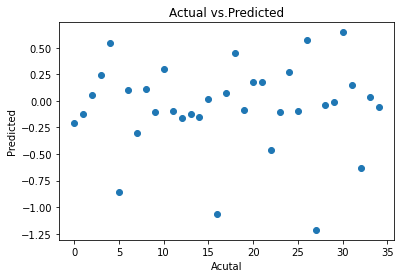

In [16]:
# plt.scatter(y_test, predictions)
plt.scatter(range(len(predictions)), [prediction - actual for prediction, actual in zip(predictions, y_test)])
plt.title('Actual vs.Predicted')
plt.xlabel('Acutal')
plt.ylabel('Predicted')